# Dicas de bibliotecas para trabalhar com dataset muito grande:

- Modin
- Dask

# Criando função estatística com numpy

In [16]:
import numpy as np

In [13]:
x  = np.random.randint(0,10,100)

In [14]:
def statistics(x):
    min = np.min(x)
    max = np.max(x)
    avg = np.mean(x)
    med = np.median(x)
    var = np.var(x)
    std = np.std(x)
    
    stats = [min, max, avg, med, var, std]
    
    return stats

In [15]:
STAT = statistics(x)

print('min: {:4.3f}'.format(STAT[0]))
print('max: {:4.3f}'.format(STAT[1]))
print('avg: {:4.3f}'.format(STAT[2]))
print('med: {:4.3f}'.format(STAT[3]))
print('var: {:4.3f}'.format(STAT[4]))
print('std: {:4.3f}'.format(STAT[5]))

min: 0.000
max: 9.000
avg: 4.300
med: 4.500
var: 8.190
std: 2.862


# Importando um dataframe

In [111]:
#importando com link
#dataparse = lambda.dates: pd.datetime.strptime(dates, '%d/%m/%Y')
#path = 'link'
#dados = pd.read_table(path, sep=';', parse_dates=['coluna_data'], index_col='coluna_index', date_parser=dateparse)

#importando do excel
#df = pd.read_excel('ndf_dolar.xlsx') #, index_col='inicio')

# Trabalhando com o pandas 

In [18]:
import pandas as pd

In [138]:
df = pd.read_excel('ndf_dolar.xlsx') #, index_col='inicio')

In [21]:
df.head(5)

,inicio,vencimento,prazo,volume_brl,volume_usd,volume_usd_sinal,usd,compra_venda
0,2020-06-24,2020-11-29,158,221204805,1.150265e+09,1.150265e+09,5.200000,compra
1,2020-03-19,2020-12-22,278,194843153,1.008933e+09,-1.008933e+09,5.178182,venda
2,2020-02-06,2021-02-24,384,120383012,6.251891e+08,-6.251891e+08,5.193333,venda
3,2020-06-16,2021-08-29,439,162119829,8.383599e+08,8.383599e+08,5.171236,compra
4,2020-03-10,2021-04-04,390,23438449,1.212118e+08,1.212118e+08,5.171494,compra


In [24]:
#numero de linhas e colunas
df.shape

(199, 8)

In [27]:
#numero de cada elemento de compra e venda 
df.compra_venda.value_counts()

compra    112
venda      87
Name: compra_venda, dtype: int64

In [35]:
# porcentagem de numero de elementos de compra e venda 
df.compra_venda.value_counts() / df.shape[0]

compra    0.562814
venda     0.437186
Name: compra_venda, dtype: float64

In [36]:
df.describe()

,prazo,volume_brl,volume_usd,volume_usd_sinal,usd
count,199.000000,1.990000e+02,1.980000e+02,1.980000e+02,198.000000
mean,359.979899,1.537207e+08,7.890292e+08,4.309663e+07,5.142911
std,157.496095,8.071960e+07,4.175072e+08,8.934052e+08,0.122279
min,55.000000,6.714977e+06,3.297054e+07,-1.491907e+09,4.160000
25%,239.000000,8.619550e+07,4.402959e+08,-7.968977e+08,5.141132
50%,359.000000,1.599020e+08,8.145576e+08,1.535049e+08,5.149305
75%,477.500000,2.189732e+08,1.121915e+09,8.157333e+08,5.179630
max,704.000000,2.926947e+08,1.513521e+09,1.513521e+09,5.660000


# Convertendo variáveis e gerando index


In [38]:
#trasnformar tipo da variável
#df.inicio = pd.to_datetime(df.inicio)
#df.prazo = pd.to_numeric(df.inicio, downcast="integer")

In [ ]:
#tornando uma coluna como index
#df.set_index('inicio', inplace=True)

In [ ]:
# gerando index
#df.reset_index(inplace=True) #tira o index da coluna de dados e retorna a contagem original

# Trabalhando com gráficos 

In [40]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [42]:
#configurando padrão
sns.set(style='whitegrid')

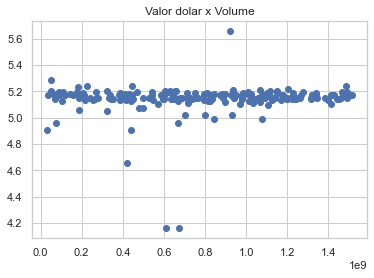

In [44]:
fig = plt.scatter(df.volume_usd, df.usd)
plt.title("Valor dolar x Volume")
plt.show(fig)

C:\Users\Rodrigo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


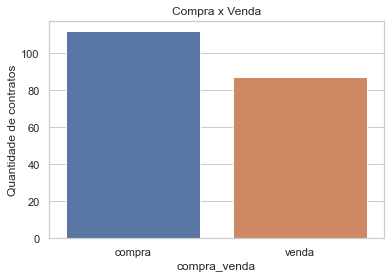

In [48]:
# compra x venda
fig = sns.countplot(df.compra_venda)
plt.title('Compra x Venda')
plt.ylabel('Quantidade de contratos')
plt.show(fig)

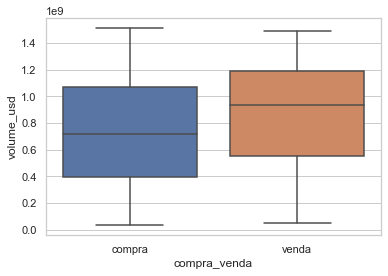

In [49]:
fig =sns.boxplot(x=df.compra_venda, y=df.volume_usd)
#plt.ylim(0, 300000)
plt.show(fig)

#  Fazendo filtro 

In [52]:
amostra = df.loc[(df.inicio >= '2020-01') & (df.vencimento <= '2021-03')]

In [57]:
amostra.dtypes

inicio              datetime64[ns]
vencimento          datetime64[ns]
prazo                        int64
volume_brl                   int64
volume_usd                 float64
volume_usd_sinal           float64
usd                        float64
compra_venda                object
dtype: object

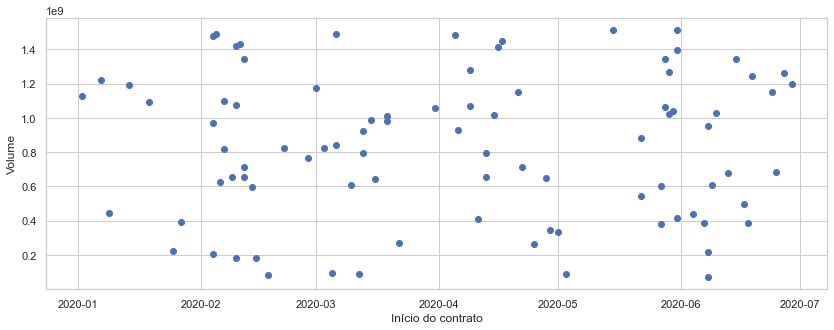

In [82]:
# Dispersão 
plt.figure(figsize=(14,5))
fig = plt.scatter(amostra.inicio, amostra.volume_usd)
plt.xlabel('Início do contrato')
plt.ylabel('Volume')
plt.show(fig)

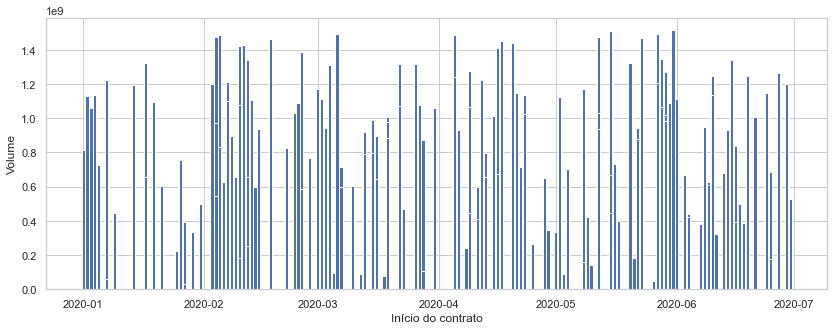

In [79]:
# gráfico de barras
plt.figure(figsize=(14,5))
fig = plt.bar(df.inicio, df.volume_usd) # ou df.inicio.dt.month
plt.xlabel('Início do contrato')
plt.ylabel('Volume')
plt.show(fig)

In [154]:
#tornando a coluna inicio como index
df.set_index('inicio', inplace=True)

In [171]:
mes = df.resample('1M').mean()
mes.head(5)

,prazo,volume_brl,volume_usd,volume_usd_sinal,usd
inicio,,,,,
2020-01-31,440.571429,1.361587e+08,7.010682e+08,2.424553e+08,5.142238
2020-02-29,388.410256,1.588644e+08,8.195026e+08,1.511012e+08,5.159110
2020-03-31,391.222222,1.455680e+08,7.520725e+08,-1.594407e+08,5.169238
2020-04-30,319.862069,1.802385e+08,9.155321e+08,-2.097166e+08,5.123496
2020-05-31,351.717949,1.599567e+08,8.244987e+08,1.145161e+08,5.149709


In [172]:
net = mes.volume_usd - mes.volume_brl
net

inicio
2020-01-31    5.649094e+08
2020-02-29    6.606381e+08
2020-03-31    6.065044e+08
2020-04-30    7.352936e+08
2020-05-31    6.645420e+08
2020-06-30    5.671458e+08
Freq: M, dtype: float64

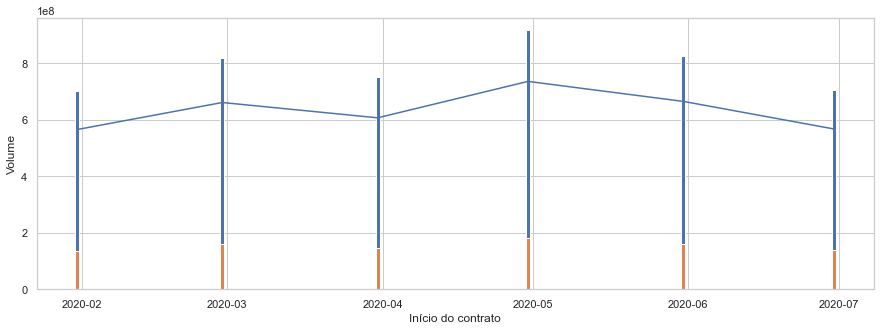

In [179]:
# gráfico de barras
plt.figure(figsize=(15,5))
fig1 = plt.bar(mes.index, mes.volume_usd) # ou df.inicio.dt.month
fig2 = plt.bar(mes.index, mes.volume_brl)
fig3 = plt.plot(mes.index, net)
#fig4 = plt.plot(mes.index, mes.volume_usd.mean())
plt.xlabel('Início do contrato')
plt.ylabel('Volume')
plt.show()

# Estatística descritiva agrupadas 


In [89]:
#média do dolar por compra e venda
df.groupby('compra_venda').agg({'usd': 'mean'})

,usd
compra_venda,
compra,5.137328
venda,5.150034


In [92]:
#média do dolar por incio e vencimento
df.groupby(['inicio','vencimento']).agg({'usd': 'mean'})

usd
inicio     vencimento          
2020-01-01 2021-05-14  5.188571
2020-01-02 2020-11-09  5.136190
           2021-04-06  5.128750
2020-01-03 2021-03-28  5.149362
2020-01-04 2021-08-16  5.147013
...                         ...
2020-06-25 2021-09-24  5.195714
2020-06-27 2020-10-07  5.146842
2020-06-29 2020-11-20  5.138261
           2021-11-05  5.060000
2020-06-30 2021-03-19  5.146486

[199 rows x 1 columns]

In [96]:
amostra2 = df.groupby('inicio').agg({'usd':'mean'})
amostra2.reset_index(inplace=True)
amostra2

,inicio,usd
0,2020-01-01,5.188571
1,2020-01-02,5.132470
2,2020-01-03,5.149362
3,2020-01-04,5.147013
4,2020-01-05,5.149796
...,...,...
110,2020-06-24,5.200000
111,2020-06-25,5.172252
112,2020-06-27,5.146842
113,2020-06-29,5.099130


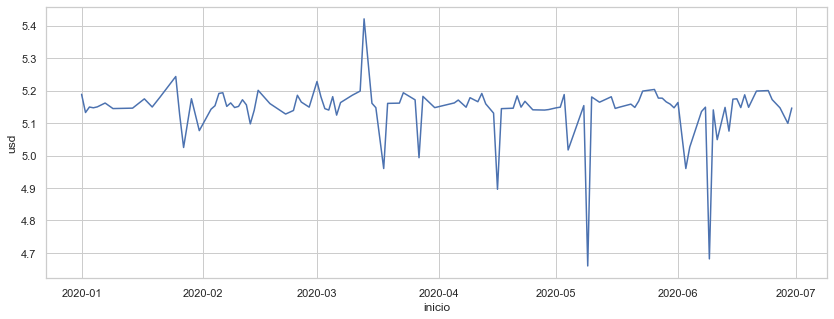

In [101]:
plt.figure(figsize=(14,5))
fig = sns.lineplot(x=amostra2.inicio, y=amostra2.usd)
plt.show(fig)

In [107]:
amostra3 = amostra2.loc[(amostra2.inicio >= '2020-05') & (amostra2.inicio <= '2020-07')]

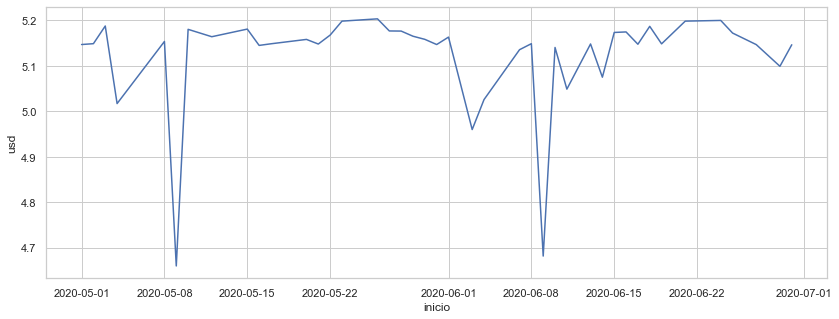

In [108]:
plt.figure(figsize=(14,5))
fig = sns.lineplot(x=amostra3.inicio, y=amostra3.usd)
plt.show(fig)

In [ ]:
#tornando a coluna inicio como index
df.set_index('inicio', inplace=True)

In [119]:
#redimensionando as datas (só funciona no index)
#bimestral '2M', trimestral 'Q'
bim = df.resample('2M').mean()
bim.head(5)

,prazo,volume_brl,volume_usd,volume_usd_sinal,usd
inicio,,,,,
2020-01-31,1.579063e+18,1.361587e+08,7.010682e+08,2.424553e+08,5.142238
2020-03-31,1.582795e+18,1.524822e+08,7.871361e+08,2.041082e+06,5.163971
2020-05-31,1.588633e+18,1.686063e+08,8.625425e+08,-2.098412e+07,5.138755
2020-07-31,1.592140e+18,1.379914e+08,7.051372e+08,1.341265e+08,5.106143


In [129]:
bim = bim[['usd']]
bim

,usd
inicio,
2020-01-31,5.142238
2020-03-31,5.163971
2020-05-31,5.138755
2020-07-31,5.106143


# Análise de Tendência (rolling) utilizando Janelas Móveis

In [122]:
from statsmodels.tsa.stattools import adfuller
import pytz

In [130]:
#fazendo a janela movel (2 meses) mensal
#periodo: mensal
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=2)
rolling_mean = bim.rolling(window=indexer, min_periods=2).mean()
rolling_mean = rolling_mean.shift(2) #deslocamento da janela = 2 meses
rolling_mean

,usd
inicio,
2020-01-31,NaN
2020-03-31,NaN
2020-05-31,5.153104
2020-07-31,5.151363


# Análise de sazonalidade 

In [137]:
usd = df[['inicio','usd']]
usd

,inicio,usd
0,2020-06-24,5.200000
1,2020-03-19,5.178182
2,2020-02-06,5.193333
3,2020-06-16,5.171236
4,2020-03-10,5.171494
...,...,...
194,2020-06-08,5.170526
195,2020-05-22,5.182222
196,2020-05-20,5.175385
197,2020-03-19,5.146842


In [139]:
usd.set_index('inicio', inplace=True)
usd

,usd
inicio,
2020-06-24,5.200000
2020-03-19,5.178182
2020-02-06,5.193333
2020-06-16,5.171236
2020-03-10,5.171494
...,...
2020-06-08,5.170526
2020-05-22,5.182222
2020-05-20,5.175385


<AxesSubplot:xlabel='inicio'>

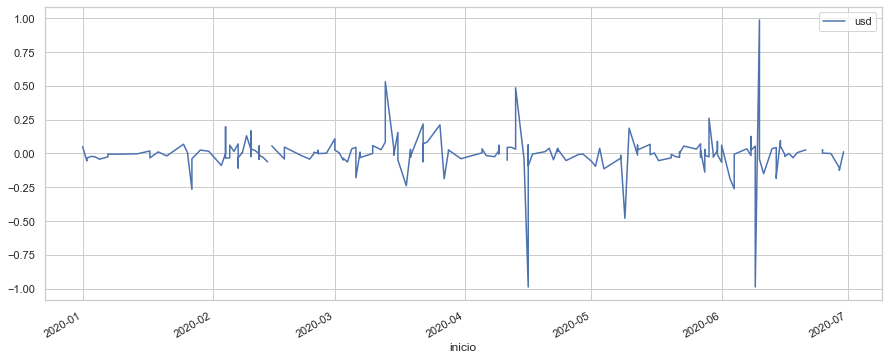

In [140]:
usd.diff().plot(figsize=(15,6))

In [143]:
#filtarndo as datas 
filtro = (usd.index >= '2020-04') & (usd.index <= '2020-06')

<AxesSubplot:xlabel='inicio'>

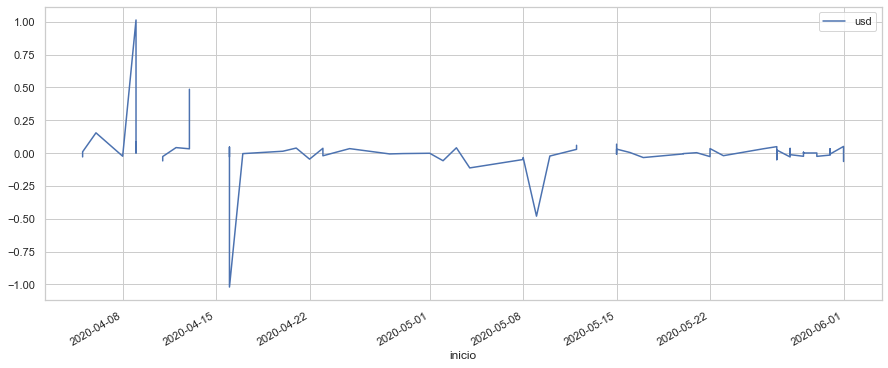

In [144]:
usd[filtro].diff().plot(figsize=(15,6))

# Análise de Tendência


In [145]:
# função para plotar média móvel

def plot_mediamovel(timeseries):
    
    rolmean = timeseries.rolling(12).mean
    plt.figure(figsize=(15,6))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Média móvel 12 meses')
    plt.legend(loc='best')
    plt.title('Valor original e média móvel dos 12 meses')
    plt.show(block=false)

In [152]:
#outra forma de extrair a média móvel usando groupby
#usd.groupby(usd.index.year).sum().plot(figsize=(15,6))